
# Car Dataset Analysis

This notebook explores key insights from the car dataset including price, performance, fuel efficiency, and market trends.
Data source: [Kaggle Car Dataset](https://www.kaggle.com/datasets/CooperUnion/cardataset)


__Import libraries__

In [300]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

__Load and overview the dataset__

In [302]:
df = pd.read_csv('data.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

__Display five rows of the data frame__

In [304]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


__Show column names to confirm correctness__

In [306]:
print(df.columns.tolist())

['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Driven_Wheels', 'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']


__Dropping irrelevant columns__

In [308]:
df = df.drop(['Driven_Wheels', 'Vehicle Style', 'Number of Doors'], axis=1)
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Market Category,Vehicle Size,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,"Factory Tuner,Luxury,High-Performance",Compact,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,"Luxury,Performance",Compact,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,"Luxury,High-Performance",Compact,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,"Luxury,Performance",Compact,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,Luxury,Compact,28,18,3916,34500


__Dropping the duplicated rows__

In [310]:
df.shape

(11914, 13)

In [311]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (883, 13)


In [312]:
df.count()      # Used to count the number of rows

Make                 11914
Model                11914
Year                 11914
Engine Fuel Type     11911
Engine HP            11845
Engine Cylinders     11884
Transmission Type    11914
Market Category       8172
Vehicle Size         11914
highway MPG          11914
city mpg             11914
Popularity           11914
MSRP                 11914
dtype: int64

In [313]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Market Category,Vehicle Size,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,"Factory Tuner,Luxury,High-Performance",Compact,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,"Luxury,Performance",Compact,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,"Luxury,High-Performance",Compact,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,"Luxury,Performance",Compact,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,Luxury,Compact,28,18,3916,34500


In [314]:
df.count()

Make                 11031
Model                11031
Year                 11031
Engine Fuel Type     11028
Engine HP            10962
Engine Cylinders     11001
Transmission Type    11031
Market Category       7756
Vehicle Size         11031
highway MPG          11031
city mpg             11031
Popularity           11031
MSRP                 11031
dtype: int64

__Dropping the missing or null values__

In [316]:
print(df.isnull().sum())

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Market Category      3275
Vehicle Size            0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


In [317]:
df = df.dropna()    # Dropping the missing values.
df.count()

Make                 7669
Model                7669
Year                 7669
Engine Fuel Type     7669
Engine HP            7669
Engine Cylinders     7669
Transmission Type    7669
Market Category      7669
Vehicle Size         7669
highway MPG          7669
city mpg             7669
Popularity           7669
MSRP                 7669
dtype: int64

In [318]:
print(df.isnull().sum())   # After dropping the values

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Market Category      0
Vehicle Size         0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64


__To explore average MPG, MSRP, and common fuel and transmission types.__


Average City MPG: 19.469552744816795
Average Highway MPG: 26.53266397183466
Average MSRP: 51419.357021775984


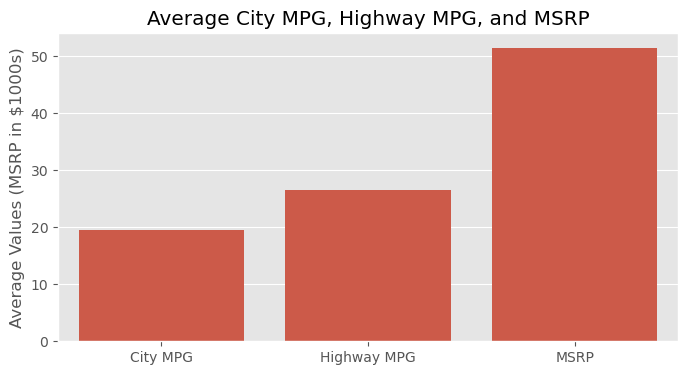


Average MSRP by Vehicle Size:
|    | Vehicle Size   |    MSRP |
|----|----------------|---------|
|  0 | Compact        | 45740.8 |
|  1 | Large          | 67653.6 |
|  2 | Midsize        | 46769.7 |


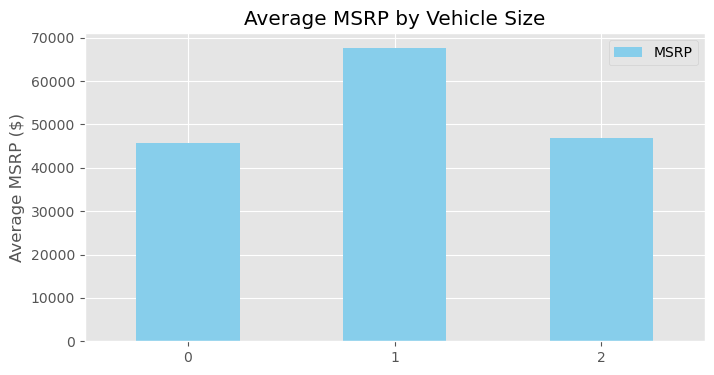


Most common Engine Fuel Types:
Engine Fuel Type
regular unleaded                                3292
premium unleaded (required)                     1915
premium unleaded (recommended)                  1345
flex-fuel (unleaded/E85)                         876
diesel                                           149
flex-fuel (premium unleaded required/E85)         53
flex-fuel (premium unleaded recommended/E85)      26
electric                                          13
Name: count, dtype: int64


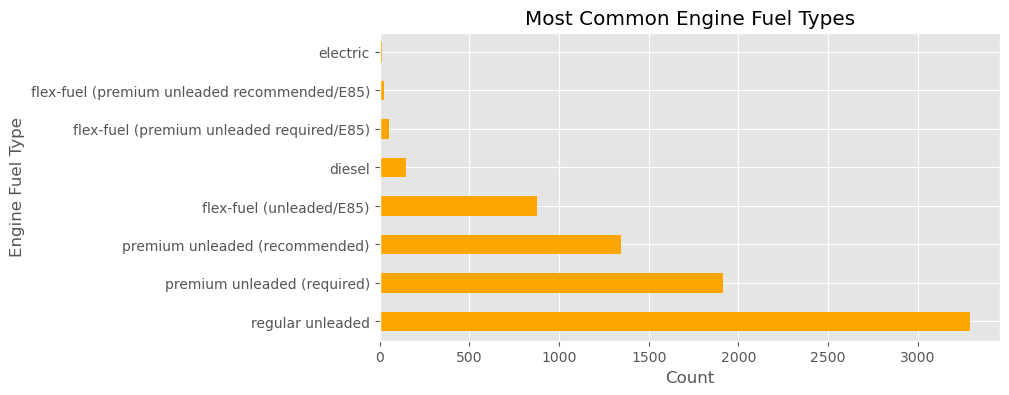


Most common Transmission Types:
Transmission Type
AUTOMATIC           5586
MANUAL              1526
AUTOMATED_MANUAL     539
DIRECT_DRIVE          15
UNKNOWN                3
Name: count, dtype: int64


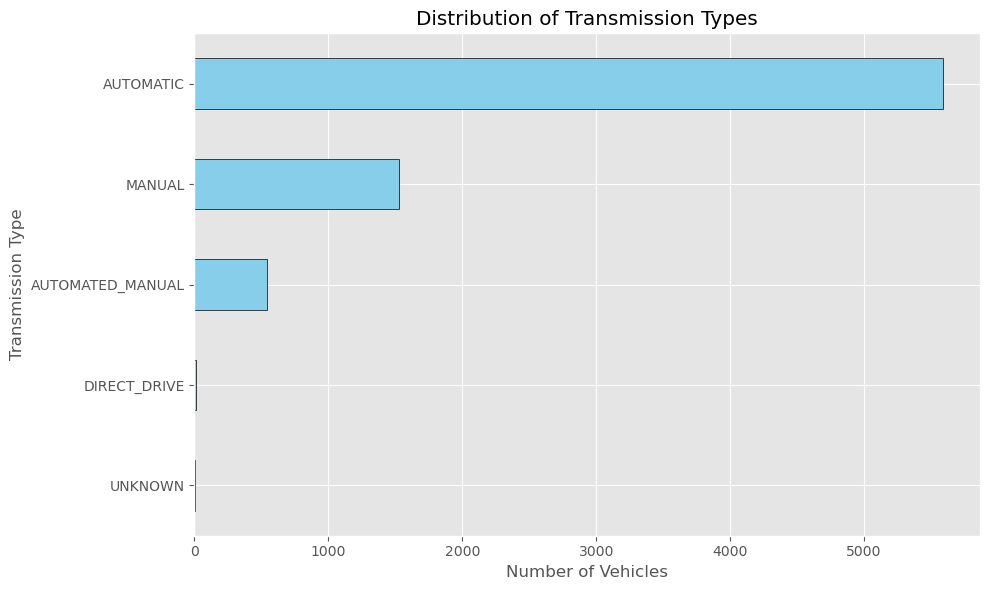

In [369]:
# 1. AVERAGE VALUES
avg_city_mpg = df['city mpg'].mean()
avg_highway_mpg = df['highway MPG'].mean()
avg_msrp = df['MSRP'].mean()

print("Average City MPG:", avg_city_mpg)
print("Average Highway MPG:", avg_highway_mpg)
print("Average MSRP:", avg_msrp)

# BAR PLOT: Average values
avg_data = {'City MPG': avg_city_mpg,'Highway MPG': avg_highway_mpg,'MSRP': avg_msrp/1000} # scaled down for better plot readability
plt.figure(figsize=(8, 4))
sns.barplot(x=list(avg_data.keys()), y=list(avg_data.values()))
plt.ylabel("Average Values (MSRP in $1000s)")
plt.title("Average City MPG, Highway MPG, and MSRP")
plt.show()

# 2. AVERAGE MSRP BY VEHICLE SIZE
from tabulate import tabulate
msrp_by_size = df.groupby('Vehicle Size')['MSRP'].mean().reset_index()
print("\nAverage MSRP by Vehicle Size:")
print(tabulate(msrp_by_size, headers='keys', tablefmt='github'))

# BAR PLOT: MSRP by vehicle size
msrp_by_size.plot(kind='bar', figsize=(8, 4), color='skyblue')
plt.ylabel("Average MSRP ($)")
plt.title("Average MSRP by Vehicle Size")
plt.xticks(rotation=0)
plt.show()

# 3. MOST COMMON ENGINE FUEL TYPES
fuel_counts = df['Engine Fuel Type'].value_counts()
print("\nMost common Engine Fuel Types:")
print(fuel_counts)

# BAR PLOT: Fuel types
fuel_counts.plot(kind='barh', figsize=(8, 4), color='orange')
plt.xlabel("Count")
plt.title("Most Common Engine Fuel Types")
plt.show()

# 4. MOST COMMON TRANSMISSION TYPES
trans_counts = df['Transmission Type'].value_counts()
print("\nMost common Transmission Types:")
print(trans_counts)

# Plot: Horizontal bar chart
plt.figure(figsize=(10, 6))
trans_counts.plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel("Number of Vehicles")
plt.title("Distribution of Transmission Types")
plt.gca().invert_yaxis()  # Highest count at the top
plt.tight_layout()
plt.show()



## 2. Price Analysis

Examine average MSRP by brand


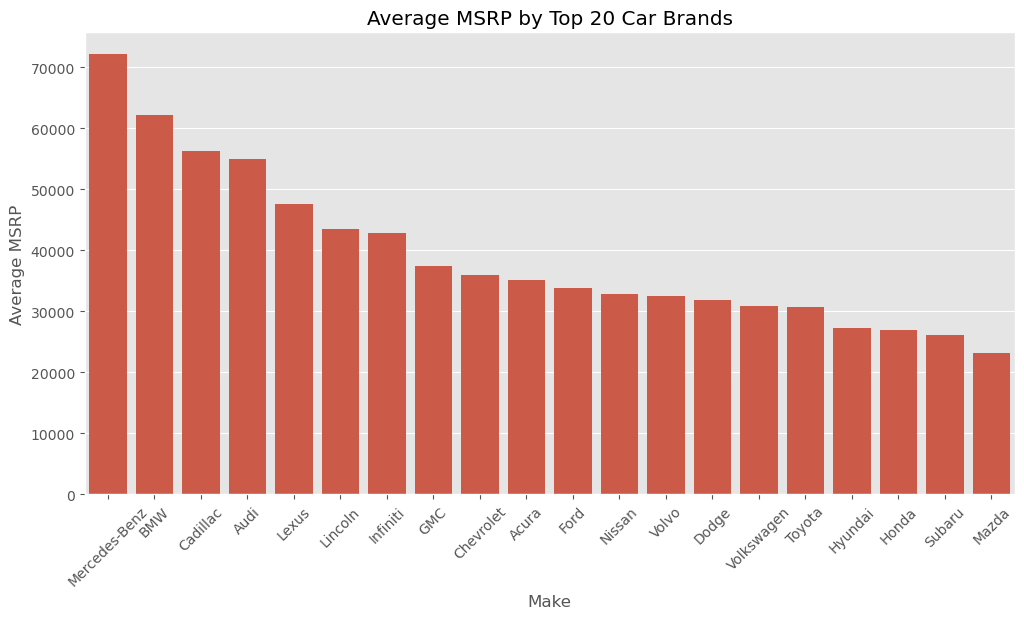

In [380]:
#Average MSRP by Brand (Top 20)
top_brands = df['Make'].value_counts().head(20).index
avg_msrp_by_brand = df[df['Make'].isin(top_brands)].groupby('Make')['MSRP'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=avg_msrp_by_brand.index, y=avg_msrp_by_brand.values)
plt.title('Average MSRP by Top 20 Car Brands')
plt.ylabel('Average MSRP')
plt.xticks(rotation=45)
plt.show()


## 3. Fuel Efficiency

Compare city and highway MPG across fuel types and top brands.


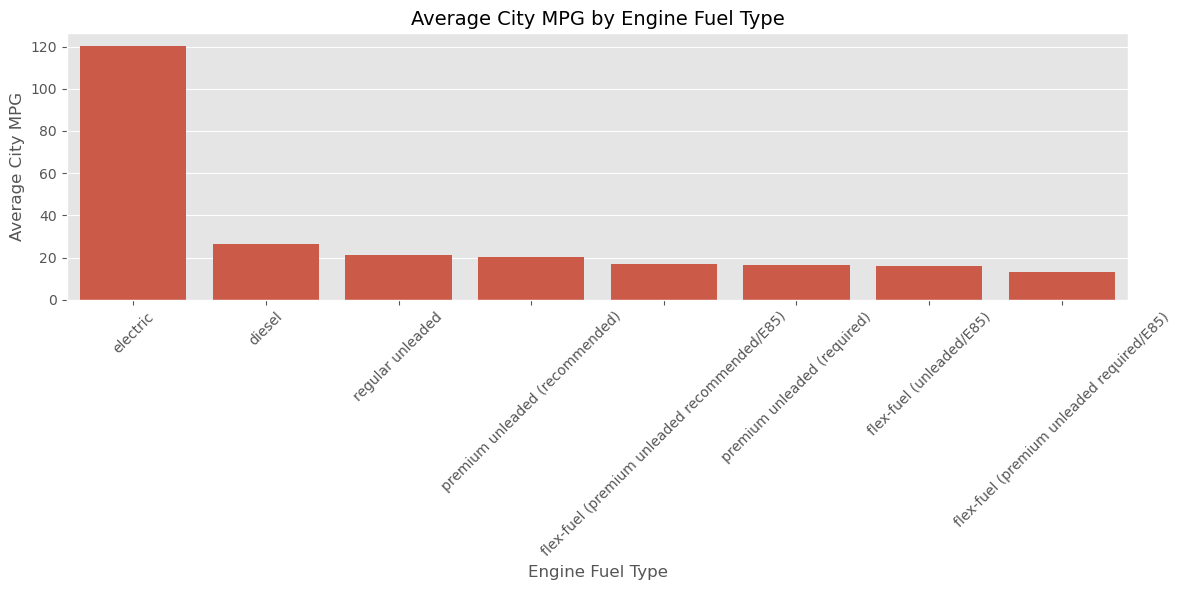

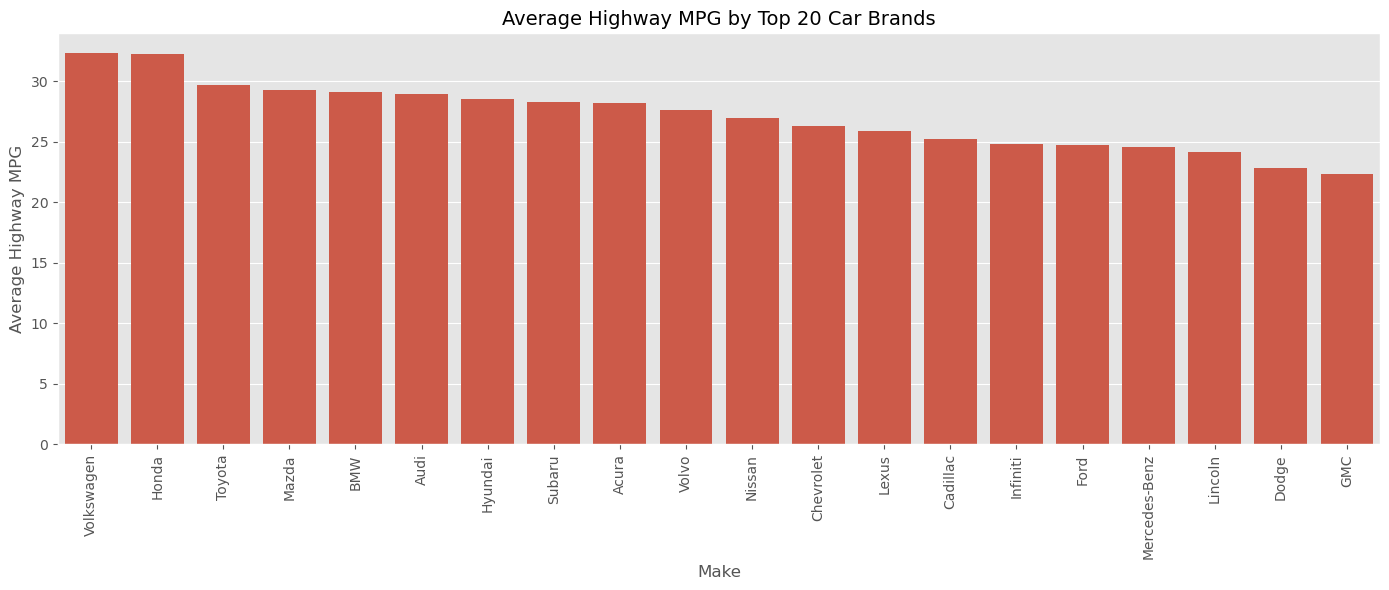

In [388]:
#1. City MPG by Engine Fuel Type
avg_city_mpg = df.groupby('Engine Fuel Type')['city mpg'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=avg_city_mpg.index, y=avg_city_mpg.values)
plt.title('Average City MPG by Engine Fuel Type', fontsize=14)
plt.ylabel('Average City MPG')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Highway MPG by Car Brand (Top 20)
top_brands = df['Make'].value_counts().index[:20]
avg_highway_mpg_by_brand = df[df['Make'].isin(top_brands)].groupby('Make')['highway MPG'].mean().sort_values(ascending=False)
plt.figure(figsize=(14,6))
sns.barplot(x=avg_highway_mpg_by_brand.index, y=avg_highway_mpg_by_brand.values)
plt.title('Average Highway MPG by Top 20 Car Brands', fontsize=14)
plt.ylabel('Average Highway MPG')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## 4. Trend Over Time

Explore how average horsepower and MPG have changed over the years.


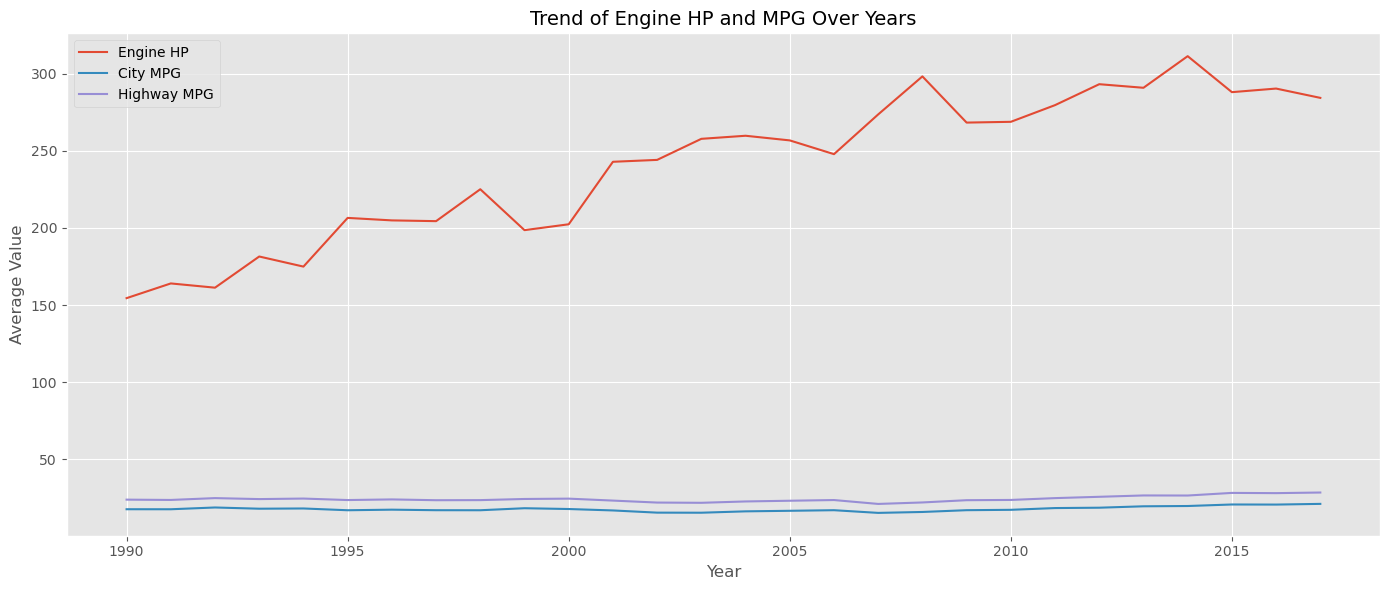

In [326]:
# Prepare data
df_year = df.groupby('Year').agg({
    'Engine HP': 'mean',
    'city mpg': 'mean',
    'highway MPG': 'mean'
}).reset_index()

# Plotting
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_year, x='Year', y='Engine HP', label='Engine HP')
sns.lineplot(data=df_year, x='Year', y='city mpg', label='City MPG')
sns.lineplot(data=df_year, x='Year', y='highway MPG', label='Highway MPG')
plt.title('Trend of Engine HP and MPG Over Years', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 5. Correlation Insights

Visualize relationships between engine horsepower, number of cylinders, MSRP, and MPG.


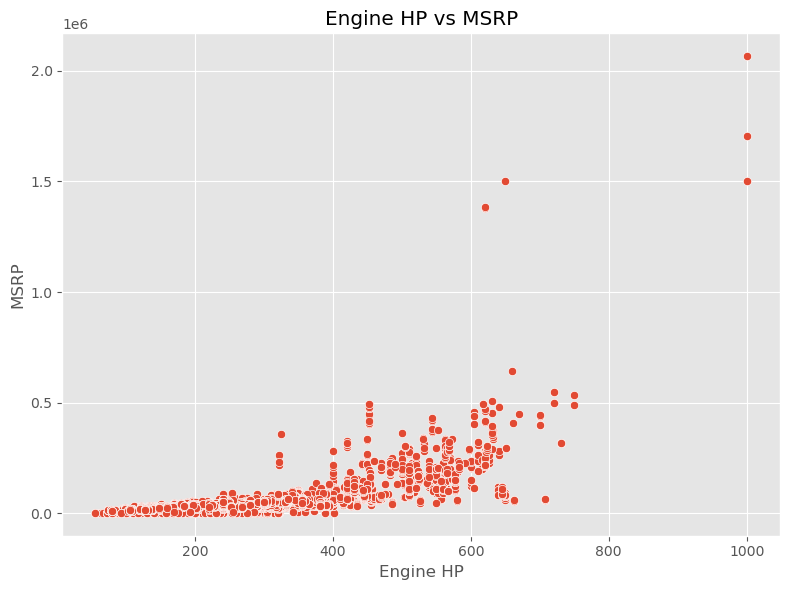

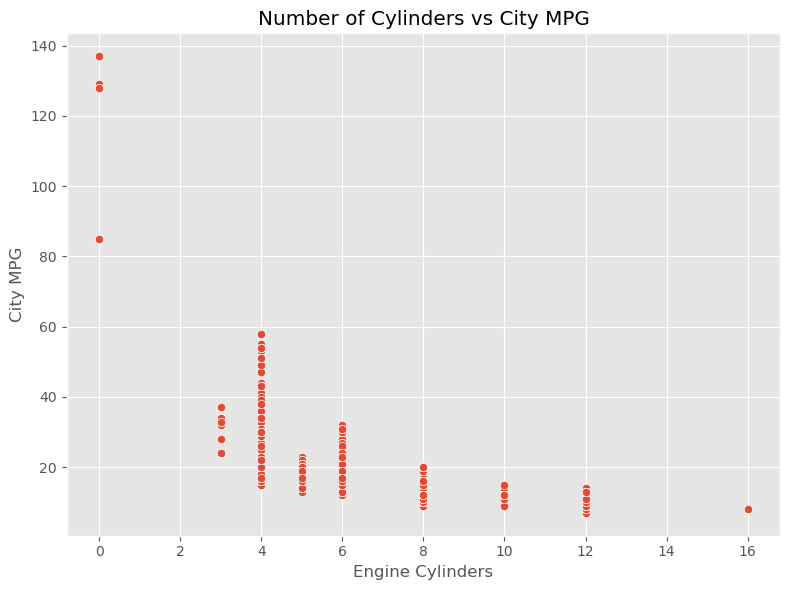

In [397]:
# Scatter plot: Engine HP vs MSRP
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Engine HP', y='MSRP', data=df)
plt.title('Engine HP vs MSRP')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter plot: Engine Cylinders vs City MPG
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Engine Cylinders', y='city mpg', data=df)
plt.title('Number of Cylinders vs City MPG')
plt.xlabel('Engine Cylinders')
plt.ylabel('City MPG')
plt.grid(True)
plt.tight_layout()
plt.show()


## 6. Market Category Insights

Analyze the top market categories and which brands dominate the luxury segment.


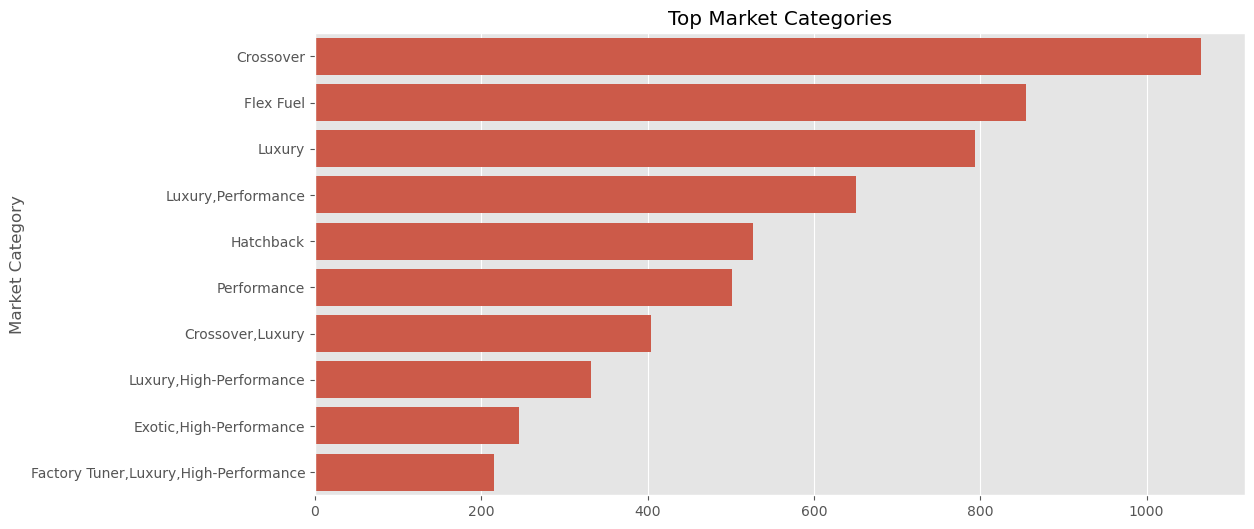

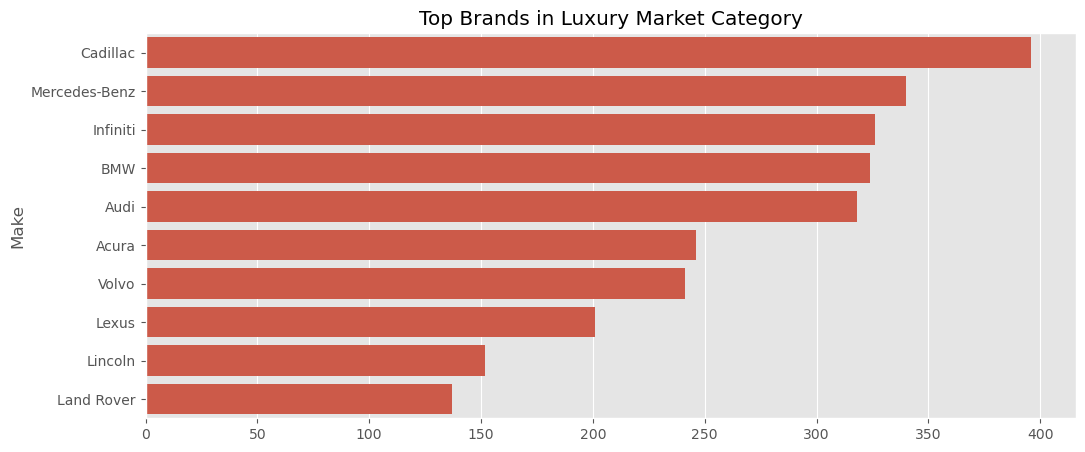

In [412]:
# Top market categories
plt.figure(figsize=(12,6))
market_cat_counts = df['Market Category'].value_counts().head(10)
sns.barplot(x=market_cat_counts.values, y=market_cat_counts.index)
plt.title('Top Market Categories')
plt.show()
# Top brands in luxury market category
luxury_cars = df[df['Market Category'].str.contains('Luxury', na=False)]
luxury_brands = luxury_cars['Make'].value_counts().head(10)
plt.figure(figsize=(12,5))
sns.barplot(x=luxury_brands.values, y=luxury_brands.index)
plt.title('Top Brands in Luxury Market Category')
plt.show()



## 7. Popularity Insights

Identify the top 10 most popular car models by average popularity score.


In [414]:

top_popular_models = df.groupby(['Make', 'Model'])['Popularity'].mean().sort_values(ascending=False).head(10)
print("Top 10 Popular Car Models:\n", top_popular_models)


Top 10 Popular Car Models:
 Make  Model              
Ford  F-150 SVT Lightning    5657.0
      Taurus X               5657.0
      Focus RS               5657.0
      Focus ST               5657.0
      Focus                  5657.0
      Flex                   5657.0
      Fiesta                 5657.0
      Freestyle              5657.0
      Fusion                 5657.0
      Fusion Hybrid          5657.0
Name: Popularity, dtype: float64


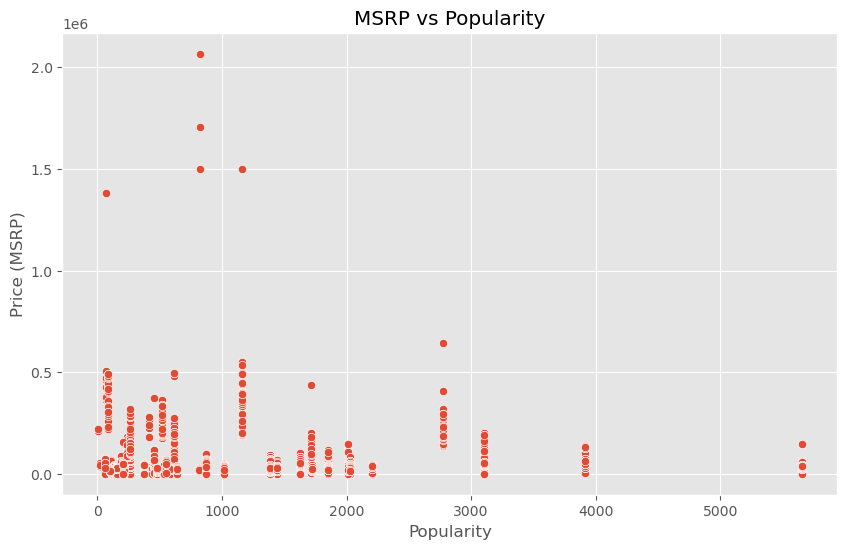

In [416]:
# Scatter Plot: MSRP vs Popularity
plt.figure(figsize=(10,6))
sns.scatterplot(x='Popularity', y='MSRP', data=df)
plt.title('MSRP vs Popularity')
plt.xlabel('Popularity')
plt.ylabel('Price (MSRP)')
plt.show()


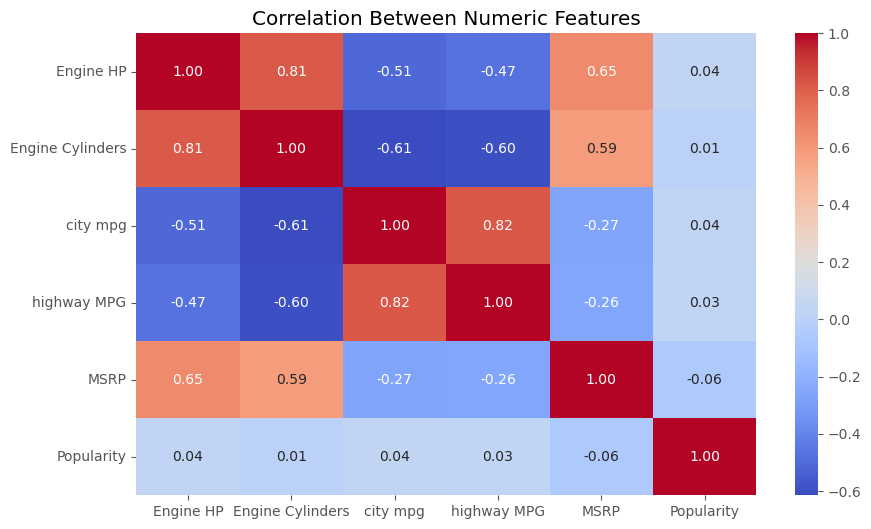

In [335]:
# Correlation Heatmap
numeric_df = df[['Engine HP', 'Engine Cylinders', 'city mpg', 'highway MPG', 'MSRP', 'Popularity']].dropna()
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Numeric Features")
plt.show()


Top 5 Most Fuel Efficient Unique Cars:
               Make                   Model  Combined MPG   MSRP
1119           Audi                      A6         189.0  51600
5790            BMW                      i3         124.0  42400
9871      Chevrolet                Spark EV         118.5  25510
1682  Mercedes-Benz  B-Class Electric Drive          83.5  39900
7708         Toyota                   Prius          55.5  25165


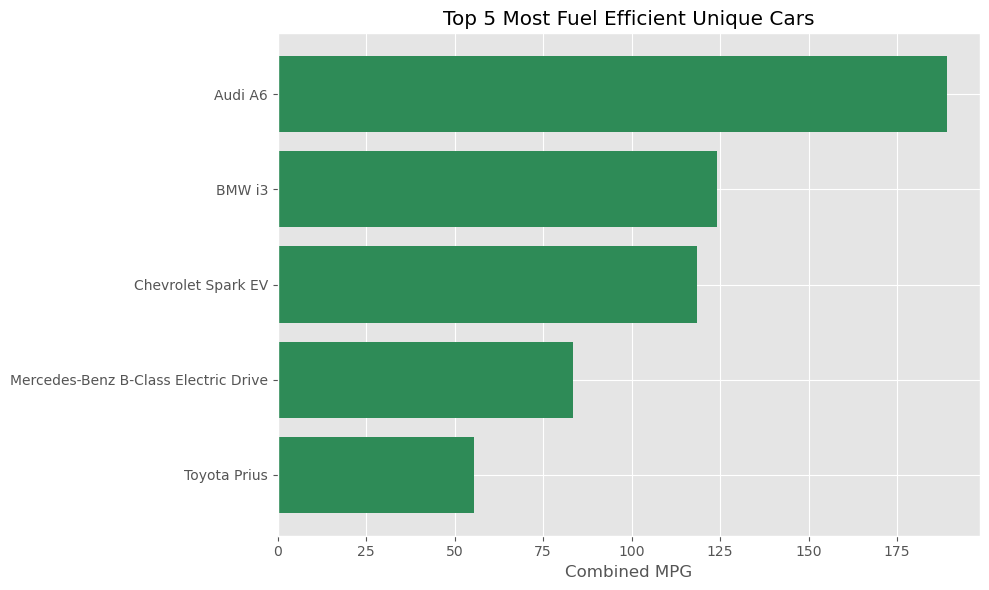

In [420]:
# Add combined MPG column
df['Combined MPG'] = (df['city mpg'] + df['highway MPG']) / 2

# Drop duplicates keeping the row with the highest Combined MPG for each (Make, Model)
df_unique = df.sort_values('Combined MPG', ascending=False).drop_duplicates(subset=['Make', 'Model'], keep='first')

# Get top 5 most fuel efficient unique cars
top_mpg_cars = df_unique[['Make', 'Model', 'Combined MPG', 'MSRP']].dropna().head(5)

print("Top 5 Most Fuel Efficient Unique Cars:")
print(top_mpg_cars)

# Plotting
plt.figure(figsize=(10,6))
plt.barh(
    top_mpg_cars['Make'] + ' ' + top_mpg_cars['Model'],
    top_mpg_cars['Combined MPG'],
    color='seagreen'
)
plt.xlabel('Combined MPG')
plt.title('Top 5 Most Fuel Efficient Unique Cars')
plt.gca().invert_yaxis()  # highest MPG on top
plt.tight_layout()
plt.show()



# Summary & Conclusion

- The dataset provides rich insights into car pricing, fuel efficiency, and market segmentation.
- Luxury brands tend to have higher MSRP and specific market categories.
- Trends over years show changes in horsepower and fuel economy.
- Popularity scores can help identify favored models for consumers.

Further work could include predictive modeling, clustering, or deeper market segmentation analysis.
